## Exploring relationships 

### 1.Importing visualization libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply
import matplotlib
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv(r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Evolution of UFC 2021-08-20\02 Data\Prepared data\ufc-master-clean1.csv', index_col = False) 

In [3]:
path = (r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement6 Sourcing Open Data\Evolution of UFC 2021-08-20')

#### 2.Data cleaning

In [4]:
# Number of columns and rows
df.shape

(4515, 31)

In [5]:
# Check column names
df.head()

,R_fighter,B_fighter,R_odds,B_odds,date,City,State/Province,country,Winner,title_bout,...,R_age,B_age,height_dif,reach_dif,age_dif,Finish2,finish,finish_details,finish_round,finish_round_time
0,Anthony Pettis,Alex Morono,-210,175,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,33,30,2.54,0.00,-3,U-DEC,U-DEC,NaN,3,5:00
1,Christos Giagos,Carlton Minus,-345,285,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,27,0.00,10.16,-3,U-DEC,U-DEC,NaN,3,5:00
2,Deron Winn,Antonio Arroyo,160,-185,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,31,31,22.86,7.62,0,U-DEC,U-DEC,NaN,3,5:00
3,Gillian Robertson,Taila Santos,-145,125,12/19/2020,Las Vegas,Nevada,USA,Blue,False,...,27,25,-2.54,-12.70,-2,U-DEC,U-DEC,NaN,3,5:00
4,Jimmy Flick,Cody Durden,-157,137,12/19/2020,Las Vegas,Nevada,USA,Red,False,...,30,29,0.00,-2.54,-1,SUB,SUB,Triangle choke,1,3:18


In [6]:
# Check column names
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'City',
       'State/Province', 'country', 'Winner', 'title_bout', 'weight_class',
       'gender', 'no_of_rounds', 'B_Stance', 'B_Height_cms', 'B_Reach_cms',
       'B_Weight_lbs', 'R_Stance', 'R_Height_cms', 'R_Reach_cms',
       'R_Weight_lbs', 'R_age', 'B_age', 'height_dif', 'reach_dif', 'age_dif',
       'Finish2', 'finish', 'finish_details', 'finish_round',
       'finish_round_time'],
      dtype='object')

In [7]:
df.dtypes

R_fighter             object
B_fighter             object
R_odds                 int64
B_odds                 int64
date                  object
City                  object
State/Province        object
country               object
Winner                object
title_bout              bool
weight_class          object
gender                object
no_of_rounds           int64
B_Stance              object
B_Height_cms         float64
B_Reach_cms          float64
B_Weight_lbs           int64
R_Stance              object
R_Height_cms         float64
R_Reach_cms          float64
R_Weight_lbs           int64
R_age                  int64
B_age                  int64
height_dif           float64
reach_dif            float64
age_dif                int64
Finish2               object
finish                object
finish_details        object
finish_round           int64
finish_round_time     object
dtype: object

In [8]:
# Check for missing values
df.isnull().sum()
# The missing values in 'finish details' are acceptible as some 'finishes does not require 'finish details' e.g. 'decisions'.

R_fighter               0
B_fighter               0
R_odds                  0
B_odds                  0
date                    0
City                    0
State/Province          0
country                 0
Winner                  0
title_bout              0
weight_class            0
gender                  0
no_of_rounds            0
B_Stance                0
B_Height_cms            0
B_Reach_cms             0
B_Weight_lbs            0
R_Stance                0
R_Height_cms            0
R_Reach_cms             0
R_Weight_lbs            0
R_age                   0
B_age                   0
height_dif              0
reach_dif               0
age_dif                 0
Finish2                 0
finish                  0
finish_details       2229
finish_round            0
finish_round_time       0
dtype: int64

In [9]:
df.drop(['R_fighter','B_fighter', 'R_odds', 'B_odds', 'date', 'City', 'State/Province', 'country', 'Winner', 'title_bout', 'finish_round_time', 'finish_details', 'Finish2', 'finish'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4515 entries, 0 to 4514
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight_class  4515 non-null   object 
 1   gender        4515 non-null   object 
 2   no_of_rounds  4515 non-null   int64  
 3   B_Stance      4515 non-null   object 
 4   B_Height_cms  4515 non-null   float64
 5   B_Reach_cms   4515 non-null   float64
 6   B_Weight_lbs  4515 non-null   int64  
 7   R_Stance      4515 non-null   object 
 8   R_Height_cms  4515 non-null   float64
 9   R_Reach_cms   4515 non-null   float64
 10  R_Weight_lbs  4515 non-null   int64  
 11  R_age         4515 non-null   int64  
 12  B_age         4515 non-null   int64  
 13  height_dif    4515 non-null   float64
 14  reach_dif     4515 non-null   float64
 15  age_dif       4515 non-null   int64  
 16  finish_round  4515 non-null   int64  
dtypes: float64(6), int64(7), object(4)
memory usage: 599.8+ KB


In [11]:
# Add calculated column indicating 'averages'
df["average_height"] = (df["B_Height_cms"] + df["R_Height_cms"])/2
df["average_age"] = (df['R_age'] +  df['B_age'])/2
df["average_reach"] = (df['B_Reach_cms'] +  df['R_Reach_cms'])/2
df["average_weight"] = (df['B_Weight_lbs'] +  df['R_Weight_lbs'])/2
df.head()

,weight_class,gender,no_of_rounds,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Stance,R_Height_cms,R_Reach_cms,...,R_age,B_age,height_dif,reach_dif,age_dif,finish_round,average_height,average_age,average_reach,average_weight
0,Welterweight,MALE,3,Orthodox,180.34,182.88,170,Orthodox,177.80,182.88,...,33,30,2.54,0.00,-3,3,179.07,31.5,182.88,162.5
1,Catch Weight,MALE,3,Orthodox,177.80,190.50,170,Orthodox,177.80,180.34,...,30,27,0.00,10.16,-3,3,177.80,28.5,185.42,162.5
2,Catch Weight,MALE,3,Orthodox,190.50,185.42,185,Orthodox,167.64,177.80,...,31,31,22.86,7.62,0,3,179.07,31.0,181.61,185.0
3,Women's Flyweight,FEMALE,3,Orthodox,165.10,160.02,125,Orthodox,167.64,172.72,...,27,25,-2.54,-12.70,-2,3,166.37,26.0,166.37,125.0
4,Flyweight,MALE,3,Southpaw,170.18,170.18,125,Orthodox,170.18,172.72,...,30,29,0.00,-2.54,-1,1,170.18,29.5,171.45,125.0


#### Answering questions as defined in previous exercise

#### How significantly has the popularity of Women’s MMA increased since its inception in 2012?

#### Correlation heatmap

In [12]:
df.corr()

,no_of_rounds,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,height_dif,reach_dif,age_dif,finish_round,average_height,average_age,average_reach,average_weight
no_of_rounds,1.000000,0.039709,0.050429,0.089934,0.053399,0.071979,0.095758,0.104704,0.163221,-0.016719,-0.021604,-0.036849,0.230016,0.049972,0.173091,0.066864,0.093802
B_Height_cms,0.039709,1.000000,0.869891,0.796691,0.740115,0.716550,0.781128,0.199769,0.111330,0.315520,0.194028,0.067500,-0.121744,0.931567,0.202451,0.867555,0.796918
B_Reach_cms,0.050429,0.869891,1.000000,0.743788,0.687220,0.673293,0.730219,0.177141,0.094163,0.220670,0.393324,0.067612,-0.102973,0.833826,0.176609,0.915426,0.744487
B_Weight_lbs,0.089934,0.796691,0.743788,1.000000,0.783206,0.757261,0.959871,0.264118,0.226266,-0.015179,-0.013989,0.030710,-0.113357,0.846819,0.318169,0.820497,0.989848
R_Height_cms,0.053399,0.740115,0.687220,0.783206,1.000000,0.898052,0.799034,0.124624,0.178062,-0.355721,-0.230317,-0.032730,-0.113981,0.933960,0.195667,0.866087,0.799205
R_Reach_cms,0.071979,0.716550,0.673293,0.757261,0.898052,1.000000,0.768527,0.121050,0.178967,-0.251307,-0.359535,-0.039236,-0.104371,0.866320,0.193895,0.913938,0.770684
R_Weight_lbs,0.095758,0.781128,0.730219,0.959871,0.799034,0.768527,1.000000,0.251050,0.234247,-0.054327,-0.041758,0.016666,-0.118514,0.847105,0.314675,0.819181,0.989986
R_age,0.104704,0.199769,0.177141,0.264118,0.124624,0.121050,0.251050,1.000000,0.190242,0.092047,0.074352,0.544156,-0.001880,0.173540,0.778988,0.163129,0.260185
B_age,0.163221,0.111330,0.094163,0.226266,0.178062,0.178967,0.234247,0.190242,1.000000,-0.088841,-0.101213,-0.528021,0.016689,0.155432,0.763783,0.149110,0.232615
height_dif,-0.016719,0.315520,0.220670,-0.015179,-0.355721,-0.251307,-0.054327,0.092047,-0.088841,1.000000,0.647263,0.127632,0.000369,-0.024640,0.003777,-0.015672,-0.035175


####  3. Create a correlation heatmap using matplotlib


In [13]:
sub = df[['average_height', 'average_weight', 'average_age', 'average_reach', 'finish_round']]

In [14]:
sub

,average_height,average_weight,average_age,average_reach,finish_round
0,179.07,162.5,31.5,182.88,3
1,177.80,162.5,28.5,185.42,3
2,179.07,185.0,31.0,181.61,3
3,166.37,125.0,26.0,166.37,3
4,170.18,125.0,29.5,171.45,1
...,...,...,...,...,...
4510,185.42,205.0,34.0,191.77,3
4511,185.42,195.0,33.0,185.42,3
4512,173.99,170.0,28.0,184.15,1
4513,190.50,240.0,28.0,194.31,1


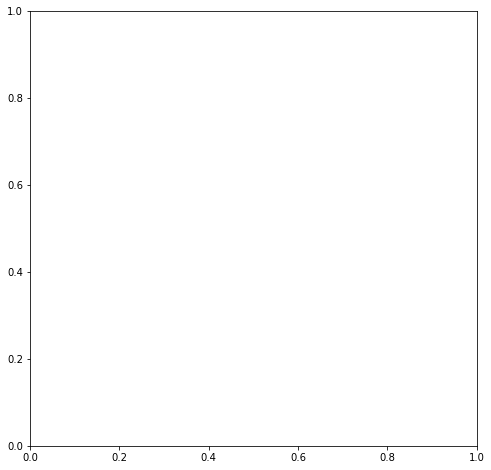

In [15]:
# Create a subplot with matplotlib. It creates an empty subplot to show the subplot.
f,ax = plt.subplots(figsize = (8,8))

In [16]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

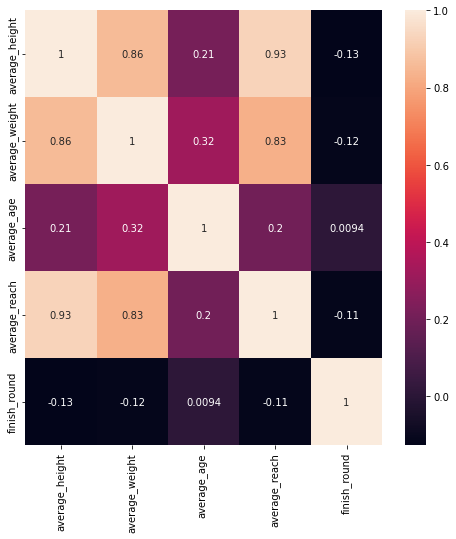

In [17]:
corr.figure

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables. 
#### The 1 indicates a perfect positive correlation. The legend indicates what the different colors mean. The black equates to 0, hence no relationship between variables; it also indicates neagative correlations. The orange and purple equates to positive correlations.

#### 4. Scatterplots

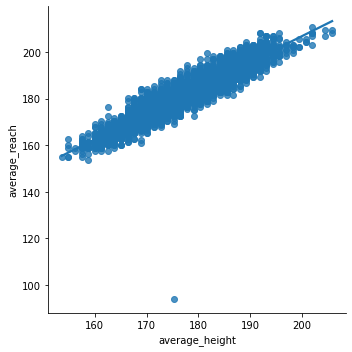

In [18]:
# Create a scatterplot for the 'average_height' and 'average_reach' columns in seaborn
sns.lmplot(x = 'average_height', y = 'average_reach', data = df)

#### Deduction: The taller the fighter, the longer the reach.

#### 5. Pair plots

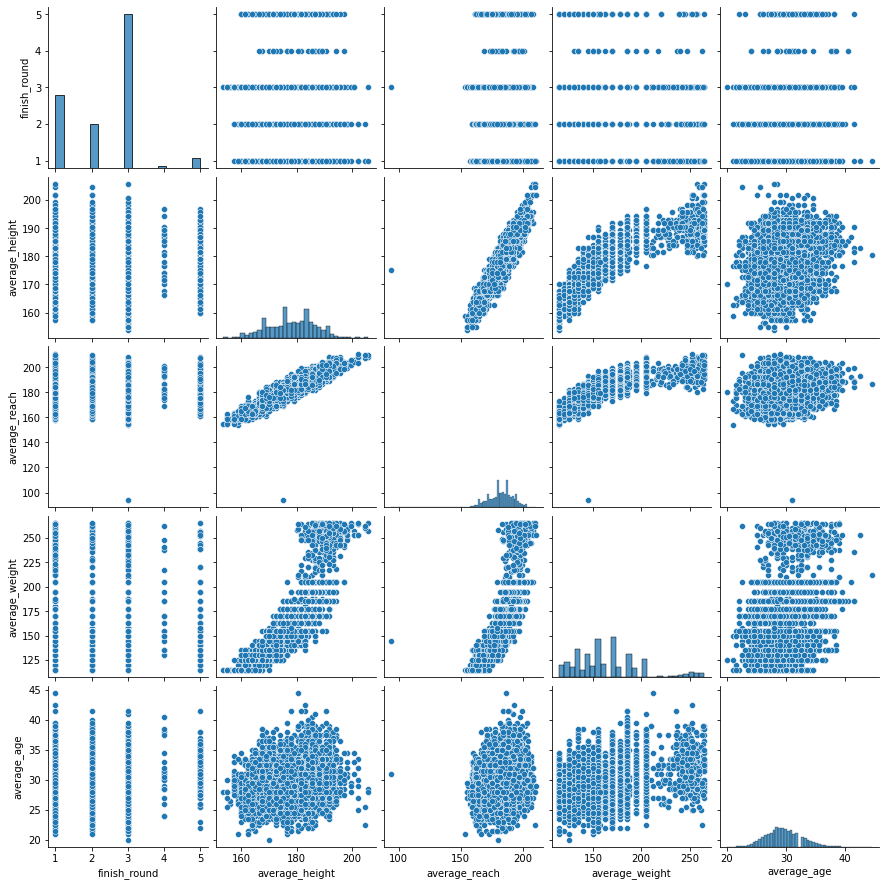

In [19]:
# Investigating variales of interest in pair plot
sub_1 = sub[['finish_round', 'average_height', 'average_reach', 'average_weight', 'average_age']]
# Create a pair plot
g = sns.pairplot(sub_1)

#### Is there a correlation between the finishing round and the physical attributes of a fighter, i.e. the average height, average weight, average age, and average reach?
#### Answer: Most MMA fights appear to finish within the first three rounds. The analysis indicates that the abovementioned physical attributes does not play a notable role in the outcome of a round. In the case of average height is seems as if much shorter to much taller participants can win a fight. It must be mentioned that in each weight division, fighters are usually nearly similar in height which makes for even ground in this respect. 

#### Age: Most interesting is that fighters who finish in the 1st round are generally between 25 and 35.
#### Average height: Taller fighters have a longer reach.
#### Weight: Taller people generally weigh more.

#### 6. Categorical plots

#### Creating a categorical variable that splits the "weight" column into numerical categories

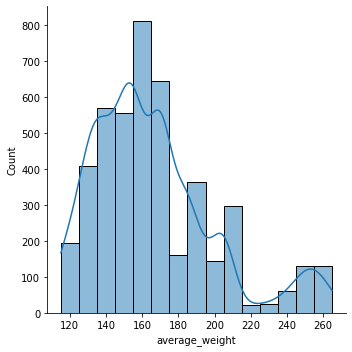

In [20]:
# Use a histogram to visualize the distribution of the variables to determine sensible categories for the weight ranges. 
sns.displot(x = 'average_weight', data = df, kde=True, bins = 15)
# OR sns.displot(df['average_weight'], kde = True, bins = 24)

In [21]:
df.loc[df['average_weight'] <= 115, 'weight_division'] = 'strawweight'

In [22]:
df.loc[(df['average_weight'] > 115) & (df['average_weight'] <= 125), 'weight_division'] = 'flyweight'

In [23]:
df.loc[(df['average_weight'] > 125) & (df['average_weight'] <= 135), 'weight_division'] = 'bantamweight'

In [24]:
df.loc[(df['average_weight'] > 135) & (df['average_weight'] <= 145), 'weight_division'] = 'featherweight'

In [25]:
df.loc[(df['average_weight'] > 145) & (df['average_weight'] <= 155), 'weight_division'] = 'lightweight'

In [26]:
df.loc[(df['average_weight'] > 155) & (df['average_weight'] <= 170), 'weight_division'] = 'welterweight'

In [27]:
df.loc[(df['average_weight'] > 170) & (df['average_weight'] <= 185), 'weight_division'] = 'middleweight'

In [28]:
df.loc[(df['average_weight'] > 185) & (df['average_weight'] <= 205), 'weight_division'] = 'light_heavyweight'

In [29]:
df.loc[(df['average_weight'] > 205) & (df['average_weight'] <= 265), 'weight_division'] = 'heavyweight'

In [30]:
df['weight_division'].value_counts(dropna = False)

welterweight         861
lightweight          779
bantamweight         620
middleweight         518
featherweight        483
light_heavyweight    442
heavyweight          374
flyweight            291
strawweight          147
Name: weight_division, dtype: int64

#### •	Considering that female MMA is relatively new, is their weight division under the top four weight divisions as an indication of its growing popularity?

#### Answer: The results indicate that the top four weight divisions are welterweight, lightweight, bantamweight, and middleweight, in order of most to least participants. The bantamweight is both a male and female weight division, which puts women in the group with the third most participants. Given that there are only four women’s weight divisions compared to eight male weight divisions, it is quite an accomplishment to be in the top three.
#### The women’s UFC division is split into only 4 classes: strawweight, flyweight, bantamweight, and featherweight. The strawweight class is only used in the women’s division and men do not compete in it. (https://www.wsn.com/ufc/weight-classes/#gref) 


In [31]:
df.columns

Index(['weight_class', 'gender', 'no_of_rounds', 'B_Stance', 'B_Height_cms',
       'B_Reach_cms', 'B_Weight_lbs', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'R_age', 'B_age', 'height_dif',
       'reach_dif', 'age_dif', 'finish_round', 'average_height', 'average_age',
       'average_reach', 'average_weight', 'weight_division'],
      dtype='object')

In [32]:
df['weight_division']

0            welterweight
1            welterweight
2            middleweight
3               flyweight
4               flyweight
              ...        
4510    light_heavyweight
4511    light_heavyweight
4512         welterweight
4513          heavyweight
4514         welterweight
Name: weight_division, Length: 4515, dtype: object

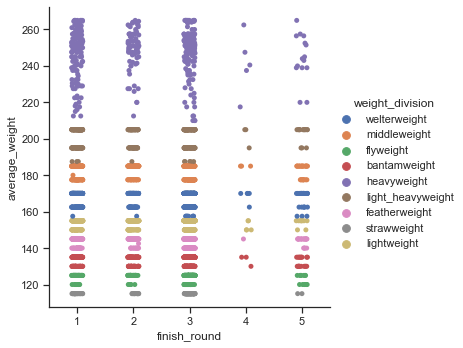

In [33]:
# Create a categorical plot in seaborn using the weight categories created above.
sns.set(style = 'ticks')
g = sns.catplot(x='finish_round', y = 'average_weight', hue = 'weight_division', data = df)

#### Deduction: All weight divisions, with the exception of strawweight and welterweight, finish mostly within the first three rounds.

In [34]:
# Export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared data', '6.2.Answers.csv'))